In [ ]:
import dask
import pandas as pd
from dask.distributed import Client
import dask.array as da
import dask.dataframe as dd
import numpy as np

In [1]:
import dask
from time import sleep

In [2]:
def inc(x):
    print('.', end='')
    sleep(1)
    return x+1

def add(x,y):
    print('.', end='')
    sleep(1)
    return x+y


In [3]:
%%time

x = inc(1)
y = inc(2)
z = add(x,y)
print()

...
CPU times: user 8.21 ms, sys: 2.23 ms, total: 10.4 ms
Wall time: 3 s


In [4]:
from dask import delayed

In [5]:
%%time
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)

CPU times: user 324 µs, sys: 56 µs, total: 380 µs
Wall time: 373 µs


In [6]:
z

Delayed('add-4ab3c098-019b-46ce-ab39-845add2c264d')

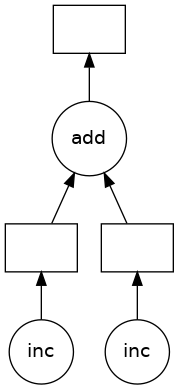

In [7]:
z.visualize()

In [8]:
%%time
z.compute()
print()

...
CPU times: user 10.8 ms, sys: 3.81 ms, total: 14.6 ms
Wall time: 2.01 s


In [9]:
values = list(range(15))
print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [10]:
%%time
results = []
for x in values:
    y = inc(x)
    results.append(y)
    
total = sum(results)
print()

...............
CPU times: user 36.9 ms, sys: 5.14 ms, total: 42 ms
Wall time: 15 s


In [11]:
%%time
results = []
for x in values:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)

CPU times: user 1.55 ms, sys: 100 µs, total: 1.65 ms
Wall time: 1.45 ms


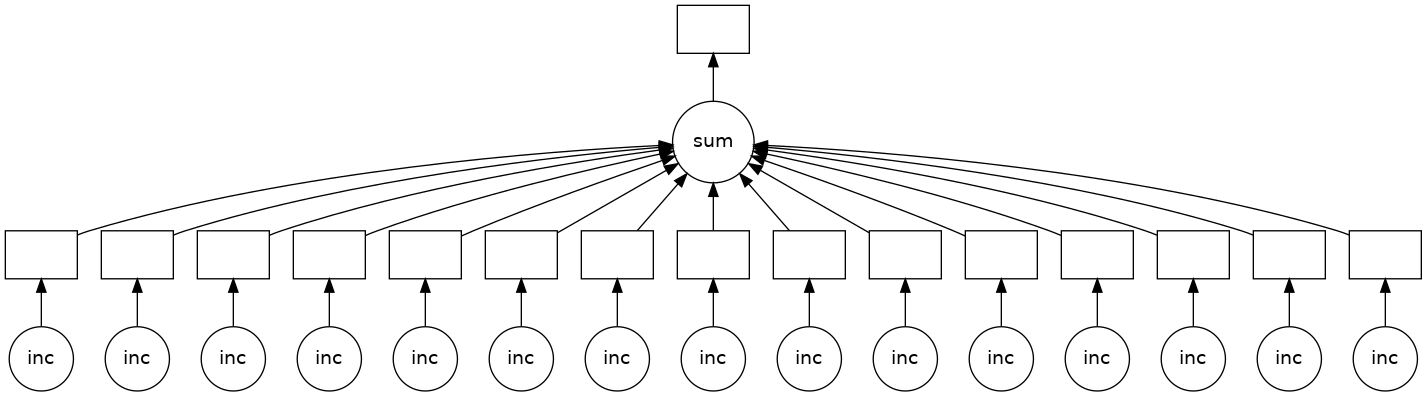

In [12]:
total.visualize()

In [14]:
%%time
total.compute()
print()

...............
CPU times: user 22.6 ms, sys: 9.03 ms, total: 31.6 ms
Wall time: 4.02 s


In [15]:
from dask.distributed import Client
client = Client()

2022-10-27 20:10:15,238 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-g8v_smfg', purging
2022-10-27 20:10:15,238 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-7nj4jpzy', purging
2022-10-27 20:10:15,238 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ps_znld0', purging
2022-10-27 20:10:15,238 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-f39jmao7', purging


CPU times: user 10.3 ms, sys: 3.38 ms, total: 13.6 ms
Wall time: 44.4 ms


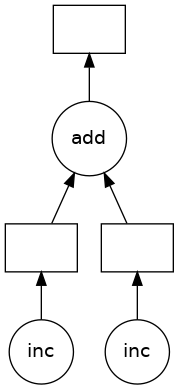

In [16]:
%%time
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)
z.visualize()

In [17]:
%%time
z.compute()
print()


CPU times: user 534 ms, sys: 120 ms, total: 654 ms
Wall time: 2.16 s


In [18]:
values = list(range(15))
print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


CPU times: user 8.85 ms, sys: 2.6 ms, total: 11.5 ms
Wall time: 56.2 ms


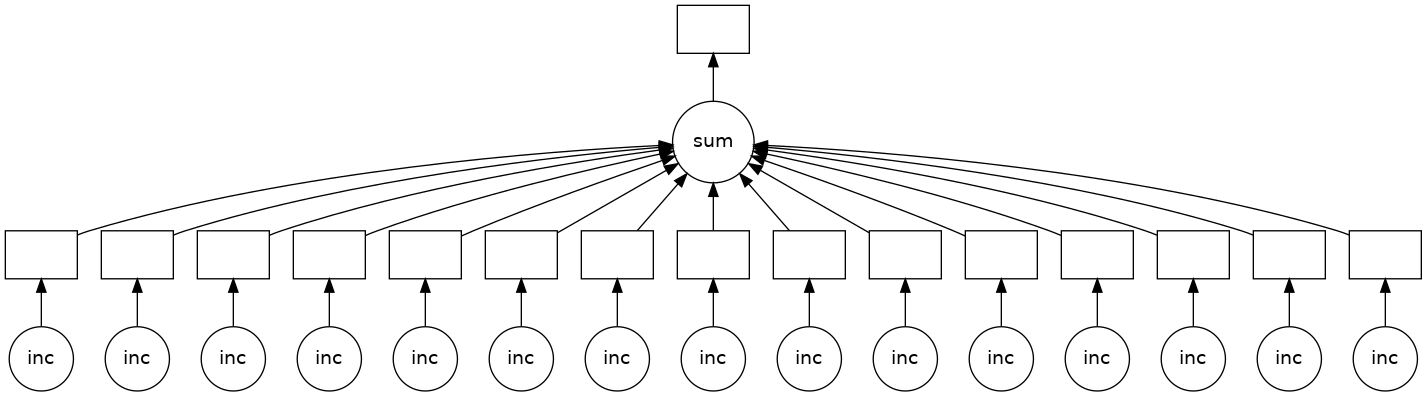

In [19]:
%%time
results = []
for x in values:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
total.visualize()

In [20]:
%%time
total.compute()
print()


CPU times: user 945 ms, sys: 176 ms, total: 1.12 s
Wall time: 4.18 s
